# Task 2: Intensity Transformation

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img = cv2.imread("outputBiLi.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

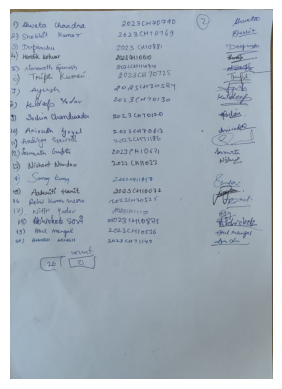

In [17]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
img.shape

(1147, 816, 3)

In [19]:
h, w, ch = img.shape
grayImg = np.zeros((h,w), dtype=np.float64)
for i in range(h):
    for j in range(w):
        grayImg[i,j] = (img[i,j][0] + img[i,j][1] + img[i,j][2])/3 # Grayscale Formula

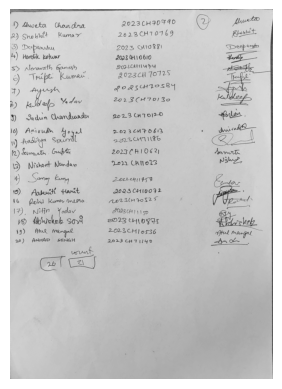

In [20]:
plt.imshow(grayImg, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
plt.imsave('grayscale.png', grayImg)

# Thresholding

In [22]:
T = 143

In [23]:
contrastImg = np.zeros_like(grayImg, dtype=np.uint8)

In [24]:
for i in range(h):
    for j in range(w):
        if grayImg[i, j] < T:
            contrastImg[i, j] = 0
        else:
            contrastImg[i, j] = 255

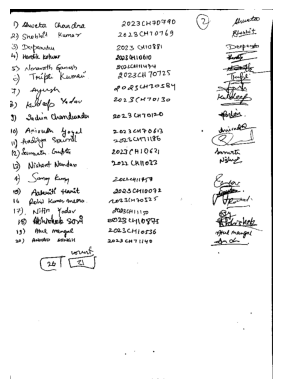

In [25]:
plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
plt.imsave('threshold.png', contrastImg)

True

# T(r) = ar + b

In [27]:
a = 2
b = -120

In [28]:
contrastImg = a*grayImg + b

In [29]:
contrastImg = np.clip(contrastImg, 0, 255).astype(np.uint8)

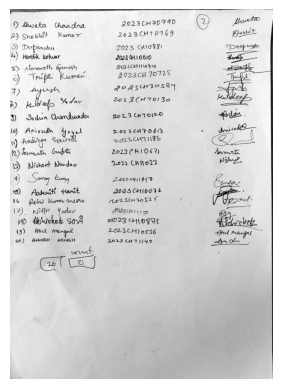

In [30]:
plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [31]:
plt.imsave('manualLinear.png', contrastImg)

True

In [155]:
# iMin = np.min(grayImg)
# iMax = np.max(grayImg)

# Parameter selection from Image Histogram

In [32]:
hist = np.zeros(256, dtype=int)
for i in range(h):
    for j in range(w):
        hist[img[i,j]] += 1

pdf = hist/(h*w)
cdf = np.zeros_like(pdf)

sum = 0
for i in range(256):
    sum += pdf[i]
    cdf[i] = sum

In [33]:
for i in range(256):
    if cdf[i] >= 0.02:
        iMin = i
        break
for i in range(256):
    if cdf[i] >= 0.98:
        iMax = i
        break

In [34]:
a = 255/(iMax-iMin)
b = -a*iMin
print(a, b)

2.65625 -172.65625


In [35]:
contrastImg = np.zeros_like(grayImg, dtype=np.uint8)
for i in range(h):
    for j in range(w):
        val = a*grayImg[i, j] + b
        if val < 0:
            val = 0
        elif val > 255:
            val = 255
        contrastImg[i, j] = int(val)

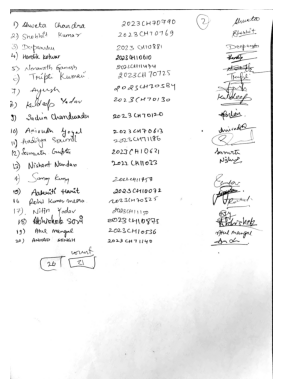

In [36]:
plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [37]:
plt.imsave('autoLinear.png', contrastImg)

True

# Histogram Equalization

In [38]:
grayImg = np.clip(grayImg, 0, 255).astype(np.uint8)

In [39]:
grayImg.shape

(1147, 816)

In [40]:
imgArray = grayImg.flatten()

In [41]:
print(imgArray)

[116 118 116 ... 173 170 122]


In [42]:
cdf = cdf/cdf[-1]

In [43]:
minCdf = cdf[np.nonzero(cdf)][0]
print(minCdf)
map = np.zeros(256, dtype=np.uint8)
for i in range(256):
    map[i] = np.floor(255*(cdf[i]-minCdf)/(1-minCdf)).astype(np.uint8)

3.5626390319882236e-07


In [44]:
contrastImg = np.zeros_like(imgArray, dtype=np.uint8)

In [45]:
for i in range(len(imgArray)):
        contrastImg[i] = map[imgArray[i]]

In [46]:
contrastImg = contrastImg.reshape(grayImg.shape)

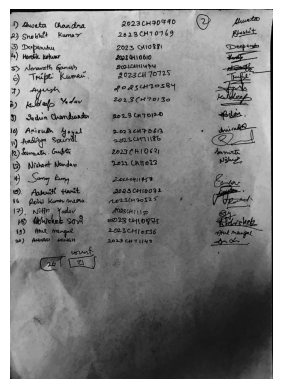

In [47]:
plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [48]:
plt.imsave('manualHEQ.png', contrastImg)

True

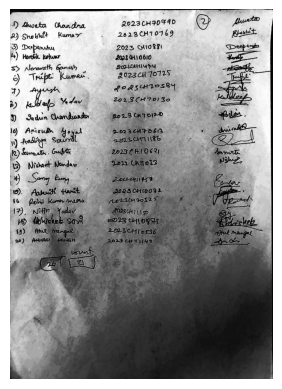

In [49]:
img = cv2.imread("outputBiLi.png", cv2.IMREAD_GRAYSCALE)

contrastImg = cv2.equalizeHist(img)

plt.imshow(contrastImg, cmap='gray')
plt.axis('off')
plt.show()

In [50]:
plt.imsave('opencvHEQ.png', contrastImg)

True